In [20]:
#!/usr/bin/env python
# vim: set fileencoding=utf-8 :
# Library imports
# By AB 
# ============================================================================
import re
import os, sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

# change the font size and tick pad
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

plt.rcParams.update({'font.size' : 30})
font = {'fontsize'   : 35}
font1 = {'fontsize'   : 30}

In [21]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/andres2085/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
# Time and height vectors are easier generated than read.
# Create a time vector and convert hours to days for better readability
t = np.arange(1, 744, 2)/24
# Create a height vector in km
h=[82, 85, 88, 91, 94, 98]

In [23]:
# Variable keep is true when we want to record data from file, otherwise false
keep=False
# Make an empty list to collect data into
data=[]
# Open the file as f, the with clause will take care of closing the file.
with open('w200901ms_2h2d.txt', 'rt') as f:
    # Loop over all lines in the file
    for line in f:
        # If the line contains "zonal"...
        if 'zonal' in line:
            # From now on, we want to keep the data from the file
            keep=True
            # Make a variable aux (Auxiliary) to collect a long string into
            aux=''
        # If line contains "merid"...
        if 'merid' in line:
            # No more data needed until next height block
            # (merid comes always after zonal)
            keep=False
            # Take the long string, cut off word 'zonal' from the front,
            # and split it into its string components, then append it to the
            # list "data", which was created above
            data.append(aux[7:].split())
        # If we want to keep the data...
        if keep:
            # add the new line to the previous while making sure there's
            # whitespace between the last number of the previous line and the
            # first number of the next line, and split into string components
            # at the same time
            aux=aux+' '+line.strip()

# Convert list data into a numpy (numerical) array of type float. Float is
# required by pcolor (see below)
wind = np.array(data).astype(float)

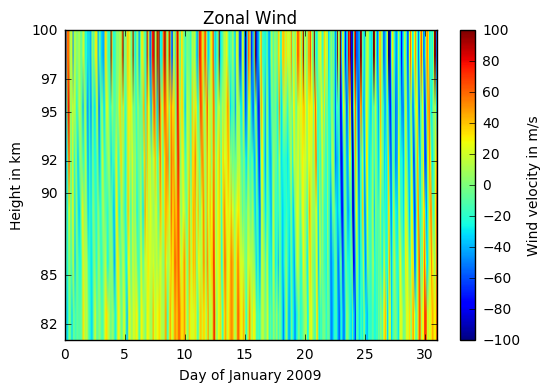

In [24]:
# Create the plot (wind as function of time t and height h)
# Set extent to cover really everything, otherwise we will not see the top altitude
plt.imshow(wind, extent=(t[0], t[-1], h[0]-1, h[-1]+2), origin='lower',
           aspect='auto')
# Since the missing values are labelled 999, we simply limit the colour scale
# to go from -100 to 100. This also puts zero in the middle of the scale.
plt.clim((-100,100))
# Label the axes and give it a title
plt.xlabel('Day of January 2009')
plt.ylabel('Height in km')
plt.yticks([82, 85, 90, 92, 95, 97, 100])
plt.xticks([0, 5, 10, 15, 20, 25, 30])
#plt.title('Sodankylä Meteor Radar - Zonal Wind')
plt.title('Zonal Wind')

# Add a colour bar for the colour scale
cb=plt.colorbar()
# Label the colour bar
cb.set_label('Wind velocity in m/s')
# Done